# Líneas, Dispersiones y Barras

## Instrucciones

En esta lección, has trabajado con gráficos de líneas, gráficos de dispersión y gráficos de barras para mostrar hechos interesantes sobre este conjunto de datos. En esta asignación, profundiza en el conjunto de datos para descubrir un hecho sobre un tipo de ave determinado. Por ejemplo, crea un cuaderno que visualice todos los datos interesantes que puedas descubrir sobre los gansos de nieve. Utiliza los tres gráficos mencionados anteriormente para contar una historia en tu cuaderno.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('../../data/birds.csv')
birds

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Blue grosbeak,Passerina caerulea,Cardinals/Allies,Passeriformes,Cardinalidae,Passerina,LC,14.0,19.0,26.0,31.5,26.0,29.0
439,Lazuli bunting,Passerina amoena,Cardinals/Allies,Passeriformes,Cardinalidae,Passerina,LC,13.0,15.0,13.0,18.0,22.0,22.0
440,Indigo bunting,Passerina cyanea,Cardinals/Allies,Passeriformes,Cardinalidae,Passerina,LC,11.5,15.0,11.2,21.4,18.0,23.0
441,Painted bunting,Passerina ciris,Cardinals/Allies,Passeriformes,Cardinalidae,Passerina,LC,12.0,14.0,13.0,19.0,21.0,23.0


Ahora de este resultado de la muestra vamos enfocarnos sobre uno en específico para explorar sus datos.

In [2]:
(birds.Name == 'Snow goose')

0      False
1      False
2       True
3      False
4      False
       ...  
438    False
439    False
440    False
441    False
442    False
Name: Name, Length: 443, dtype: bool

Esto muestra una serie de falsos y verdaderos donde podemos observar que no hay verdaderos que indiquen donde pueda estar nuestra busqueda.

In [3]:
sum((birds.Name == 'Snow goose'))

1

## Filtrar datos para gansos de nieve

Hacemos un filtro que se enfoque solo en la fila de esta especie

In [5]:
snow_goose_data = birds[birds['Name'] == 'Snow goose']
snow_goose_data

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0


### Comparación
Vamos a comparar con algunas otras aves de nuestro conjunto de datos

In [9]:
indigoBuntingData= birds[birds['Name'] == 'Indigo bunting']

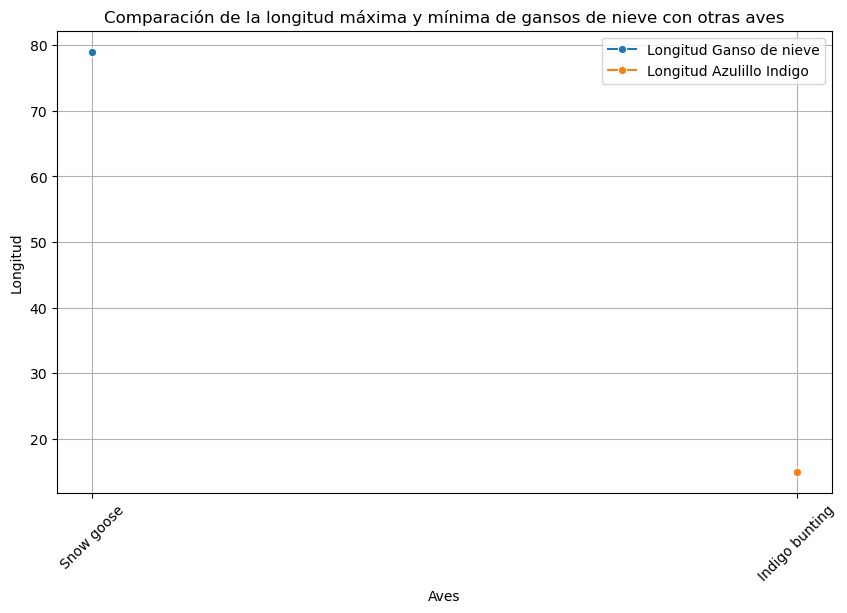

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Name', y='MaxLength', data=snow_goose_data, marker='o', label='Longitud Ganso de nieve')
sns.lineplot(x='Name', y='MaxLength', data=indigoBuntingData, marker='o', label='Longitud Azulillo Indigo')
plt.title('Comparación de la longitud máxima y mínima de gansos de nieve con otras aves')
plt.xlabel('Aves')
plt.ylabel('Longitud')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Lo comparamos en el caso de la longitud con otra ave como el Azulillo indigo, en este caso el ganzo de nieve lo sobrepasa por mucho.

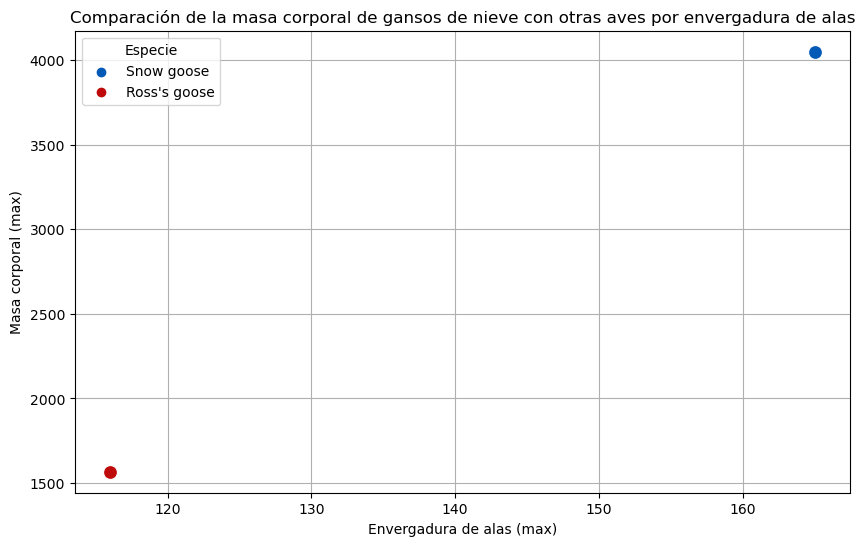

In [30]:
ross_goose_data = birds[birds['Name'] == "Ross's goose"]	

# Gráfico de dispersión: Comparación de la masa corporal de gansos de nieve con otras aves por envergadura de alas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaxWingspan', y='MaxBodyMass', data=snow_goose_data, hue='Name', palette=["#0359b6"], s=100)
sns.scatterplot(x='MaxWingspan', y='MaxBodyMass', data=ross_goose_data, hue='Name', palette=["#be0a0a"], s=100)
plt.title('Comparación de la masa corporal de gansos de nieve con otras aves por envergadura de alas')
plt.xlabel('Envergadura de alas (max)')
plt.ylabel('Masa corporal (max)')
plt.legend(title='Especie')
plt.grid(True)
plt.show()

Nuevamente en esta comparacion el ganso de nieve sobrepasa al ganso de Ross en su masa corporal y envergadura de alas.

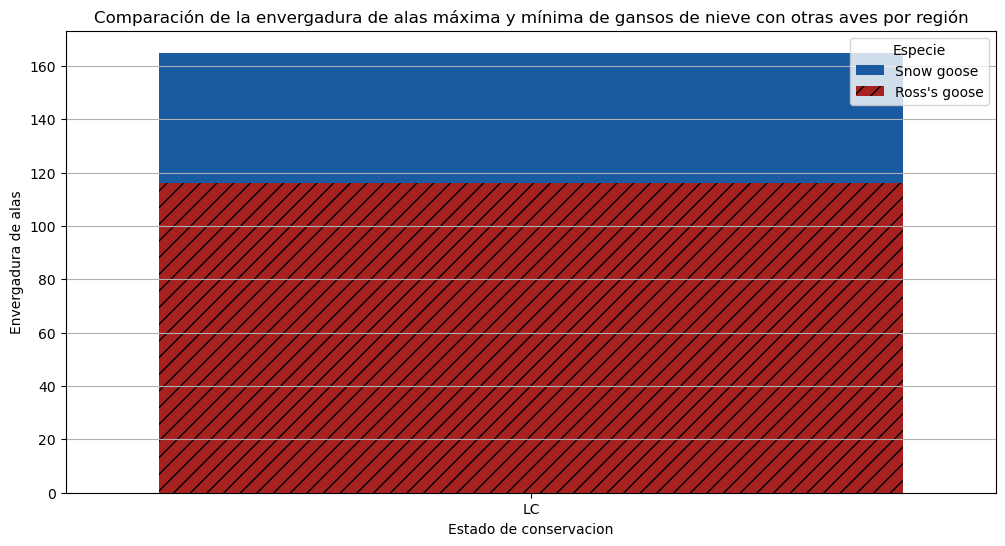

In [33]:
# Gráfico de barras: Comparación de la envergadura de alas máxima y mínima de gansos de nieve con otras aves por región
plt.figure(figsize=(12, 6))
sns.barplot(x='ConservationStatus', y='MaxWingspan', data=snow_goose_data, palette=["#0359b6"], hue='Name')
sns.barplot(x='ConservationStatus', y='MaxWingspan', data=ross_goose_data, palette=["#be0a0a"], hue='Name', hatch='//')
plt.title('Comparación de la envergadura de alas máxima y mínima de gansos de nieve con otras aves por región')
plt.xlabel('Estado de conservacion')
plt.ylabel('Envergadura de alas')
plt.legend(title='Especie')
plt.grid(axis='y')
plt.show()

En este caso medimos el estado de conservacion y la envergadura de las alas en lo cual el ganso de Ross logro sobrepasar al ganso de nieve.